In [1]:
from copy import deepcopy, copy
from functools import partial
from IPython.display import Image

from tqdm import tqdm
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.integrate import solve_ivp

## 1.1 SIRS

\begin{align*}
    &\mu = \upsilon \\
    S \xrightarrow{\beta} &I \xrightarrow{\gamma} R \xrightarrow{\eta} S
\end{align*}

\begin{align*}
\frac{dS}{dt} &= \mu N - \frac{\beta S I}{N} + \eta R - \upsilon S \\
    \frac{dI}{dt} &= \frac{\beta S I}{N} - \gamma I - \upsilon I \\
    \frac{dR}{dt} &= \gamma I - \eta R - \upsilon R \\
\end{align*}

In [2]:
N = 10000

Just a naive run

In [3]:
args = {
    "beta": 0.9,
    "gamma": 0.1,
    "eta": 0.1,
    "mu": 0.01,
    "upsilon": 0.01
}

We run experiments on constant population $\mu = \upsilon$

In [4]:
def sirs_eq_system(t, y0, beta, gamma, eta, mu, upsilon):
    S, I, R = y0
    dSdt = upsilon * N - beta * S * I / N + eta * R - upsilon * S
    dIdt = beta * S * I / N - gamma * I - upsilon * I
    dRdt = gamma * I - eta * R - upsilon * R
    return dSdt, dIdt, dRdt

In [5]:
t = np.linspace(0, 200, 1000)
y0 = (N - 50, 50, 0)
target_eq_sys = partial(sirs_eq_system, **args)

In [6]:
solution = solve_ivp(target_eq_sys, [t[0], t[-1]], y0, t_eval=t)

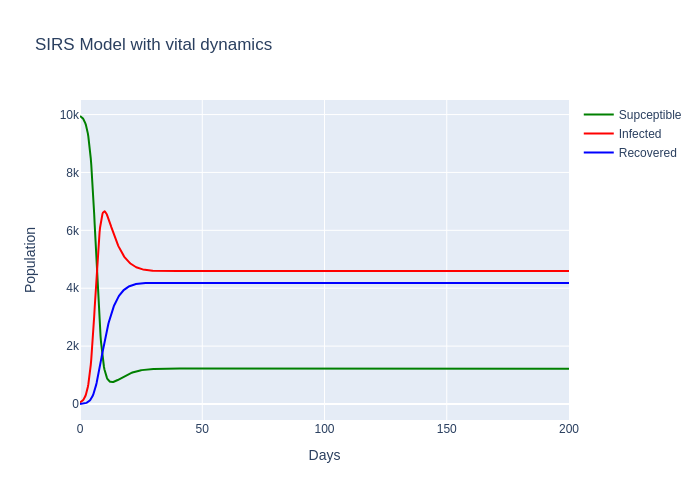

In [7]:
fig = go.Figure([
    go.Scatter(x=solution.t, y=solution.y[0], name="Supceptible", line_color="green"),
    go.Scatter(x=solution.t, y=solution.y[1], name="Infected", line_color="red"),
    go.Scatter(x=solution.t, y=solution.y[2], name="Recovered", line_color="blue")
])
fig.update_layout(
    yaxis_title="Population",
    xaxis_title="Days",
    title="SIRS Model with vital dynamics"
)
Image(fig.to_image(format="png"))

Play with $\beta$

In [8]:
beta_range = np.linspace(0.1, 1, 9)

In [9]:
def make_experiment(equations_system, t, y0, params, argument_sequence, argument_name):
    result = []
    for i in tqdm(argument_sequence):
        kwargs = deepcopy(params)
        kwargs[argument_name] = i
        target = partial(equations_system, **kwargs)
        result.append(solve_ivp(target, [t[0], t[-1]], y0, t_eval=t))
    return result


def print_experiments(results, argument_sequence, argument_name):
    fig = make_subplots(rows=3, cols=3, subplot_titles=[f"{argument_name}={i}" for i in argument_sequence])
    for i, solution in enumerate(results):
        row = i // 3 + 1
        col = i % 3 + 1
        additional_keys = {"showlegend": True} if i == 0 else {"showlegend": False}
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[0], name="Supceptible", line_color="green", **additional_keys), row=row, col=col)
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[1], name="Infected", line_color="red", **additional_keys), row=row, col=col)
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[2], name="Recovered", line_color="blue", **additional_keys), row=row, col=col)
    return Image(fig.to_image(format="png"))

100%|██████████| 9/9 [00:00<00:00, 13.55it/s]


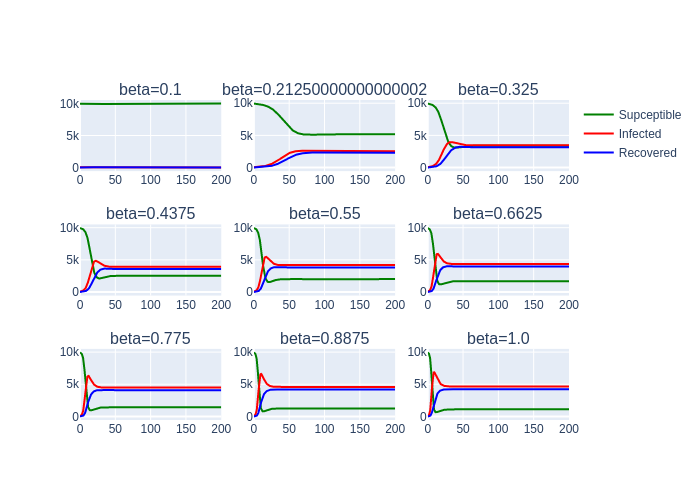

In [10]:
solutions = make_experiment(sirs_eq_system, t, y0, args, beta_range, "beta")
print_experiments(solutions, beta_range, "beta")

Play with $\gamma$

In [11]:
gamma_range = np.linspace(0.1, 1, 9)

100%|██████████| 9/9 [00:00<00:00, 16.38it/s]


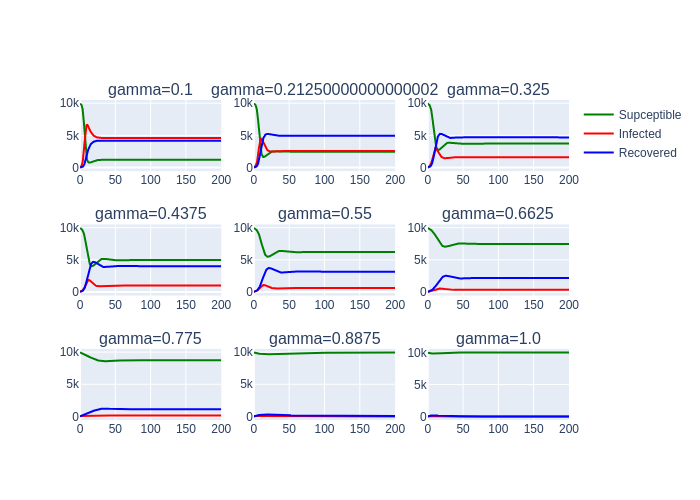

In [12]:
solutions = make_experiment(sirs_eq_system, t, y0, args, gamma_range, "gamma")
print_experiments(solutions, gamma_range, "gamma")

Play with $\eta$

In [13]:
eta_range = np.linspace(0.1, 1, 9)

100%|██████████| 9/9 [00:00<00:00, 10.87it/s]


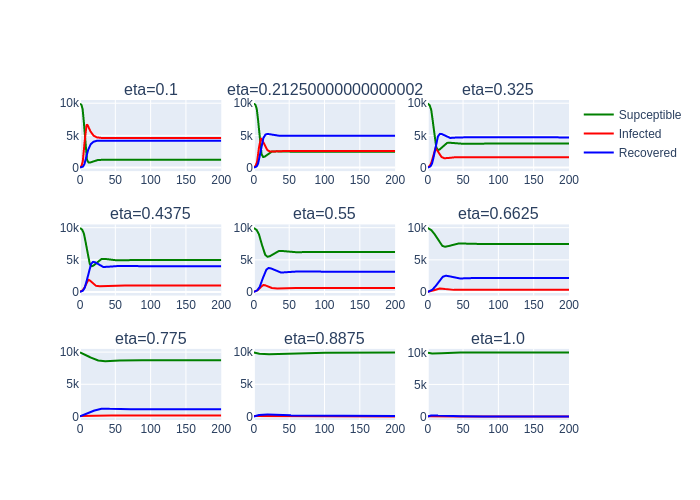

In [14]:
solution = make_experiment(sirs_eq_system, t, y0, args, eta_range, "eta")
print_experiments(solutions, eta_range, "eta")

Play with $\upsilon$

In [15]:
upsilon_range = np.linspace(0.1, 1, 9)

100%|██████████| 9/9 [00:00<00:00, 14.29it/s]


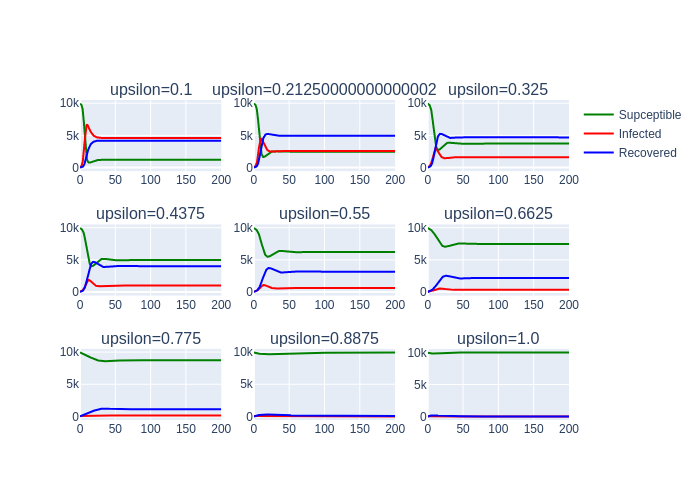

In [16]:
solution = make_experiment(sirs_eq_system, t, y0, args, upsilon_range, "upsilon")
print_experiments(solutions, upsilon_range, "upsilon")

We have taken different parameters ranges and even for the highest rate of infecting the number of infected population is constant in long perspective.

## 1.2 SEIRS

\begin{align*}
    &\mu = \upsilon \\
    S \xrightarrow{\beta} &E \xrightarrow{\sigma} I \xrightarrow{\gamma} R \xrightarrow{\eta} S \\
\end{align*}

\begin{align*}
    \frac{dS}{dt} &= \mu N - \frac{\beta S I}{N} + \eta R - \upsilon S \\
    \frac{dE}{dt} &= \frac{\beta S I}{N} - \sigma E - \mu E \\
    \frac{dI}{dt} &= \sigma E - \gamma I - \upsilon I \\
    \frac{dR}{dt} &= \gamma I - \eta R - \upsilon R \\
\end{align*}

Usual experiment first

In [17]:
args = {
    "beta": 0.9,
    "sigma": 0.4,
    "gamma": 0.1,
    "eta": 0.1,
    "mu": 0.01,
    "upsilon": 0.01
}

In [18]:
def seirs_eq_system(t, y0, beta, sigma, gamma, eta, mu, upsilon):
    S, E, I, R = y0
    dSdt = upsilon * N - beta * S * I / N + eta * R - upsilon * S
    dEdt = beta * S * I / N - sigma * E - upsilon * E
    dIdt = sigma * E - gamma * I - upsilon * I
    dRdt = gamma * I - eta * R - upsilon * R
    return dSdt, dEdt, dIdt, dRdt

In [19]:
y0 = (N - 50, 25, 25, 0)
target_eq_sys = partial(seirs_eq_system, **args)

In [20]:
solution = solve_ivp(target_eq_sys, [t[0], t[-1]], y0, t_eval=t)

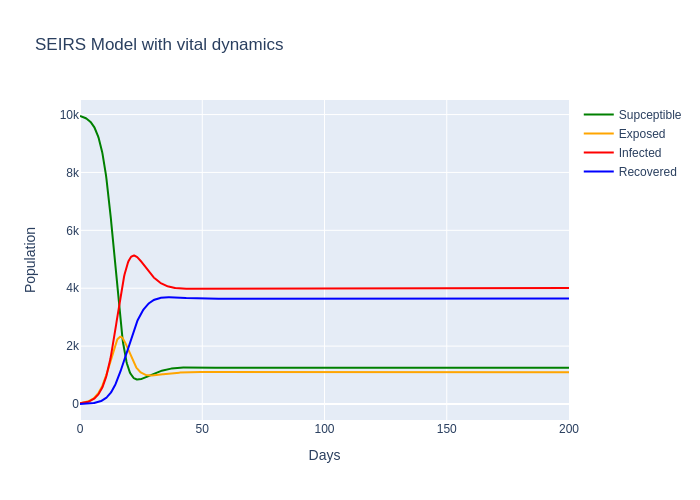

In [21]:
fig = go.Figure([
    go.Scatter(x=solution.t, y=solution.y[0], name="Supceptible", line_color="green"),
    go.Scatter(x=solution.t, y=solution.y[1], name="Exposed", line_color="orange"),
    go.Scatter(x=solution.t, y=solution.y[2], name="Infected", line_color="red"),
    go.Scatter(x=solution.t, y=solution.y[3], name="Recovered", line_color="blue")
])
fig.update_layout(
    yaxis_title="Population",
    xaxis_title="Days",
    title="SEIRS Model with vital dynamics"
)
Image(fig.to_image(format="png"))

Play with $\beta$

In [22]:
def print_seirs_experiments(results, argument_sequence, argument_name):
    fig = make_subplots(rows=3, cols=3, subplot_titles=[f"{argument_name}={i}" for i in argument_sequence])
    for i, solution in enumerate(results):
        row = i // 3 + 1
        col = i % 3 + 1
        additional_keys = {"showlegend": True} if i == 0 else {"showlegend": False}
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[0], name="Supceptible", line_color="green", **additional_keys), row=row, col=col)
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[1], name="Exposed", line_color="orange", **additional_keys), row=row, col=col)
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[2], name="Infected", line_color="red", **additional_keys), row=row, col=col)
        fig.add_trace(go.Scatter(x=solution.t, y=solution.y[3], name="Recovered", line_color="blue", **additional_keys), row=row, col=col)
    return Image(fig.to_image(format="png"))

100%|██████████| 9/9 [00:00<00:00, 34.38it/s]


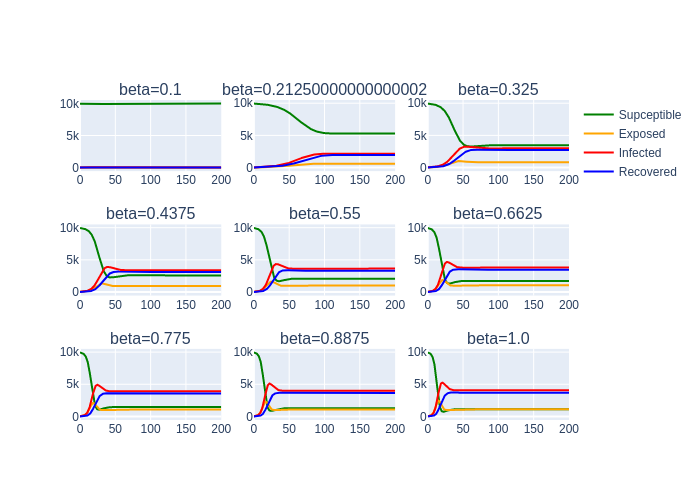

In [23]:
solutions = make_experiment(seirs_eq_system, t, y0, args, beta_range, "beta")
print_seirs_experiments(solutions, beta_range, "beta")

Play with $\sigma$

In [24]:
sigma_range = np.linspace(0.1, 1, 9)

100%|██████████| 9/9 [00:00<00:00, 11.53it/s]


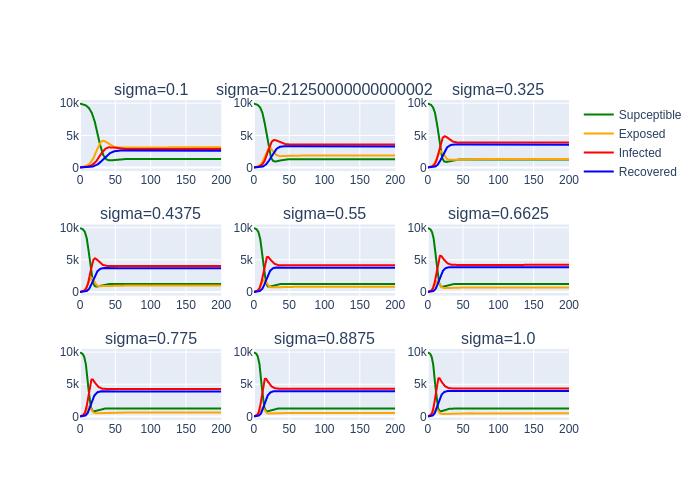

In [25]:
solutions = make_experiment(seirs_eq_system, t, y0, args, sigma_range, "sigma")
print_seirs_experiments(solutions, gamma_range, "sigma") 

Play with $\gamma$

100%|██████████| 9/9 [00:00<00:00, 10.38it/s]


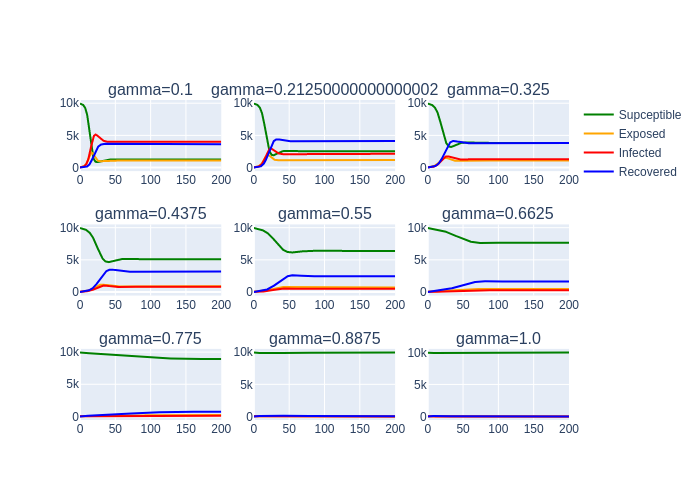

In [26]:
solutions = make_experiment(seirs_eq_system, t, y0, args, gamma_range, "gamma")
print_seirs_experiments(solutions, gamma_range, "gamma")

Play with $\eta$

100%|██████████| 9/9 [00:01<00:00,  8.03it/s]


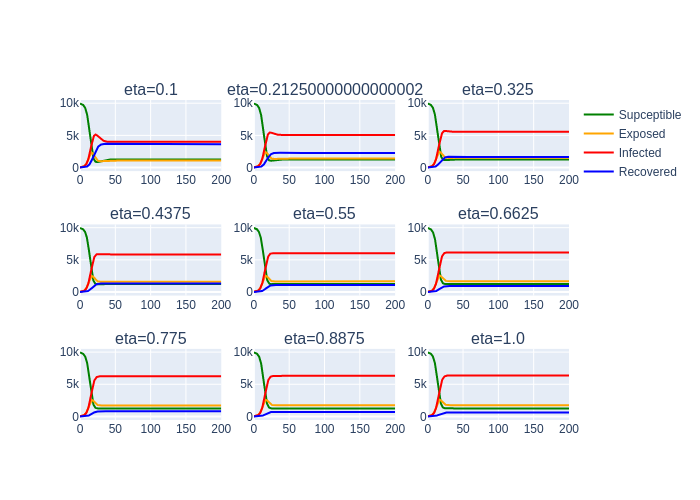

In [27]:
solutions = make_experiment(seirs_eq_system, t, y0, args, eta_range, "eta")
print_seirs_experiments(solutions, eta_range, "eta")

Play with $\upsilon$

100%|██████████| 9/9 [00:01<00:00,  8.02it/s]


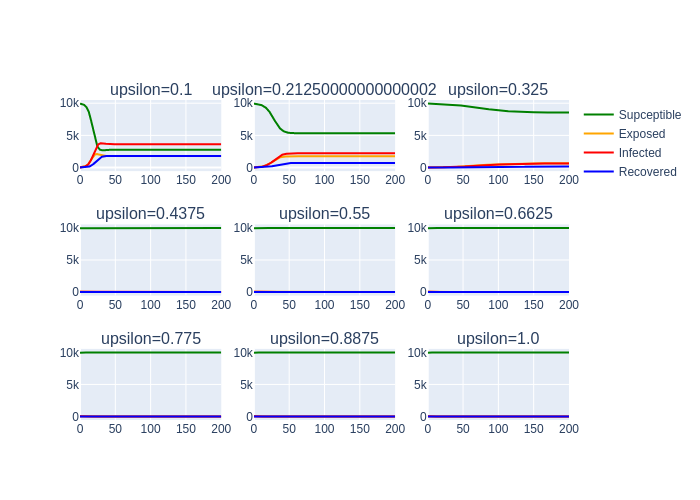

In [28]:
solutions = make_experiment(seirs_eq_system, t, y0, args, upsilon_range, "upsilon")
print_seirs_experiments(solutions, upsilon_range, "upsilon")

Adding additional state does not really make any difference between models.